# German (Konstanz) dataset 

documentation: https://nbviewer.jupyter.org/github/isc-konstanz/household_data/blob/2020-04-15/main.ipynb

Data source: https://data.open-power-system-data.org/household_data/2020-04-15


Total Photovoltaic energy generation in kWh


#Notes

- The values are cumulative - instead should be values for a certain hour of a day
- Match hours with UTC of both datasets when combined
- Pipeline for models and parameters

In [1]:
#Mount google drive
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt


path = '/content/drive/MyDrive/Master_thesis/household_data_60min_singleindex.csv'

Mounted at /content/drive


In [2]:
from pandas import read_csv

GERdata = read_csv(path, header=0, parse_dates=[0], index_col=0, squeeze=True) # the first column, utc time, is an index column 



In [ ]:
GERdata.head()

In [5]:
#Removing non-solar-generation columns

# print(type(GERdata)) #<class 'pandas.core.frame.DataFrame'>


#remooving irrelevant columns, keeping utc and cest columns
for col in GERdata.columns:
  if "cet_cest_timestamp" in col:
    pass
  elif "pv" not in col:
    GERdata = GERdata.drop(col, axis=1)

GERdata.head()
print(GERdata.columns)

Index(['cet_cest_timestamp', 'DE_KN_industrial1_pv_1',
       'DE_KN_industrial1_pv_2', 'DE_KN_industrial2_pv',
       'DE_KN_industrial3_pv_facade', 'DE_KN_industrial3_pv_roof',
       'DE_KN_residential1_pv', 'DE_KN_residential3_pv',
       'DE_KN_residential4_pv', 'DE_KN_residential6_pv'],
      dtype='object')


In [6]:


GERdata.index = pandas.to_datetime(GERdata.index)  # converting index (utc_timestamp) to datetime format of pandas
GERdata['Berlin_time']= GERdata.index.tz_convert('Europe/Berlin')

GERdata.head()
#GERdata.info()

,cet_cest_timestamp,DE_KN_industrial1_pv_1,DE_KN_industrial1_pv_2,DE_KN_industrial2_pv,DE_KN_industrial3_pv_facade,DE_KN_industrial3_pv_roof,DE_KN_residential1_pv,DE_KN_residential3_pv,DE_KN_residential4_pv,DE_KN_residential6_pv,Berlin_time
utc_timestamp,,,,,,,,,,,
2014-12-11 17:00:00+00:00,2014-12-11T18:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-11 18:00:00+01:00
2014-12-11 18:00:00+00:00,2014-12-11T19:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-11 19:00:00+01:00
2014-12-11 19:00:00+00:00,2014-12-11T20:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-11 20:00:00+01:00
2014-12-11 20:00:00+00:00,2014-12-11T21:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-11 21:00:00+01:00
2014-12-11 21:00:00+00:00,2014-12-11T22:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-11 22:00:00+01:00


In [7]:
GERdata.info()  #DatetimeIndex: 38454 entries, 2014-12-11 17:00:00+00:00 to 2019-05-01 22:00:00+00:00

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38454 entries, 2014-12-11 17:00:00+00:00 to 2019-05-01 22:00:00+00:00
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype                        
---  ------                       --------------  -----                        
 0   cet_cest_timestamp           38454 non-null  object                       
 1   DE_KN_industrial1_pv_1       17288 non-null  float64                      
 2   DE_KN_industrial1_pv_2       17288 non-null  float64                      
 3   DE_KN_industrial2_pv         12000 non-null  float64                      
 4   DE_KN_industrial3_pv_facade  14360 non-null  float64                      
 5   DE_KN_industrial3_pv_roof    14360 non-null  float64                      
 6   DE_KN_residential1_pv        15873 non-null  float64                      
 7   DE_KN_residential3_pv        22555 non-null  float64                      
 8   DE_KN_residential4_pv        20360 non-

#Visualisation

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f631b280610>,
      dtype=object)

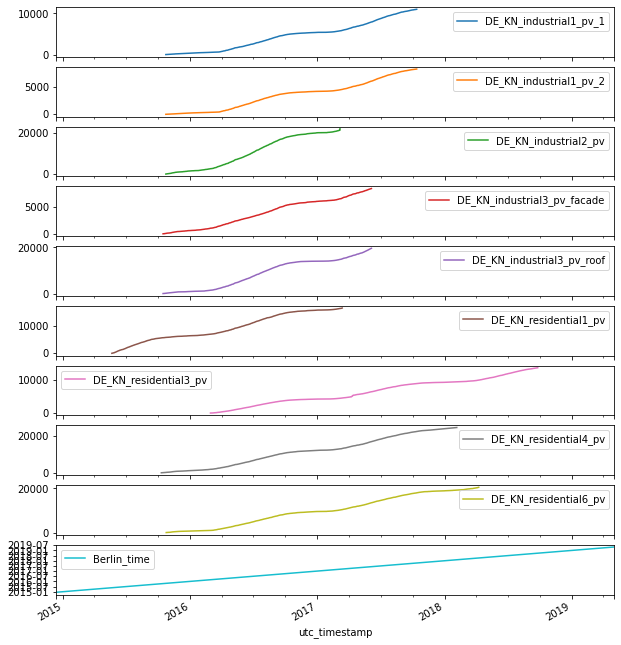

In [8]:
GERdata.plot(subplots=True, figsize=(10,12))

In [11]:
GERdata.index

DatetimeIndex(['2014-12-11 17:00:00+00:00', '2014-12-11 18:00:00+00:00',
               '2014-12-11 19:00:00+00:00', '2014-12-11 20:00:00+00:00',
               '2014-12-11 21:00:00+00:00', '2014-12-11 22:00:00+00:00',
               '2014-12-11 23:00:00+00:00', '2014-12-12 00:00:00+00:00',
               '2014-12-12 01:00:00+00:00', '2014-12-12 02:00:00+00:00',
               ...
               '2019-05-01 13:00:00+00:00', '2019-05-01 14:00:00+00:00',
               '2019-05-01 15:00:00+00:00', '2019-05-01 16:00:00+00:00',
               '2019-05-01 17:00:00+00:00', '2019-05-01 18:00:00+00:00',
               '2019-05-01 19:00:00+00:00', '2019-05-01 20:00:00+00:00',
               '2019-05-01 21:00:00+00:00', '2019-05-01 22:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='utc_timestamp', length=38454, freq=None)

<BarContainer object of 41 artists>

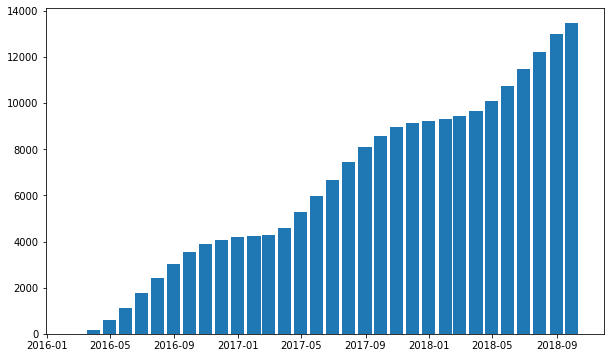

In [12]:
#seasonality

GERdata_month = GERdata.resample("M").mean()

fig, ax = plt.subplots(figsize=(10, 6))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.bar(GERdata_month['2016':].index, GERdata_month.loc['2016':, "DE_KN_residential3_pv"], width=25, align='center')

In [ ]:
# remove periods that inaccurate (from February 2016 according to the data description) and is missing. Also last years??

# removing from utc_timestamp (index) but adjusted time to Berlin_date so that we have from Feb 1 2016 to Feb 1 2018
GERdata = GERdata.loc['2016-01-31 23:00:00+00:00' : '2018-01-31 23:00:00+00:00']

GERdata.head()

In [ ]:
# As we can see from the graphs, values are not actual but cumulative. Here we substract every value from the previous period
# the first row is turned to zero to ignore cumulative values before February 2016. 

for col in GERdata.columns:
  if col!= "cet_cest_timestamp" and col!= "Berlin_time":
    GERdata[col] = GERdata[col].sub(GERdata[col].shift()) #substracting values from the previous value
    GERdata[col].iloc[0] = 0     #removing accumulated value from the previous hour because it is hour from the midnight (there is no sunlight anyway)


GERdata.head(20)

In [ ]:
# extract year, month, day, time from the data and create new columns 

GERdata["Year"] = GERdata["Berlin_time"].dt.year
GERdata["Month"] = GERdata["Berlin_time"].dt.month
GERdata["Season"] = GERdata["Berlin_time"].dt.quarter
GERdata["Week"] = GERdata["Berlin_time"].dt.week
GERdata["Day"] = GERdata["Berlin_time"].dt.day
GERdata["Year_day"] = GERdata["Berlin_time"].dt.dayofyear
GERdata["Hour"] = GERdata["Berlin_time"].dt.hour

GERdata.head()

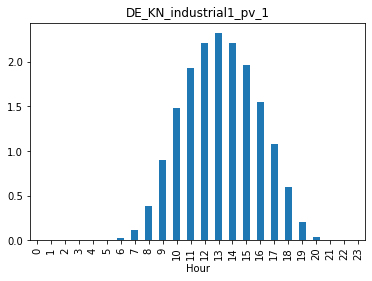

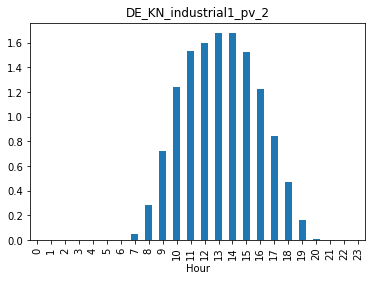

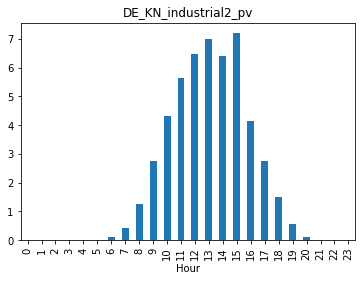

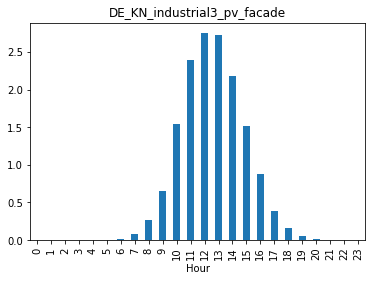

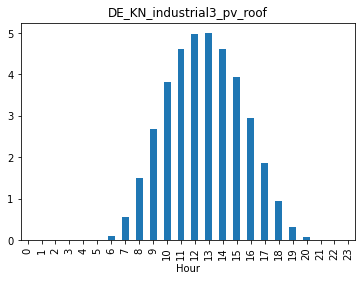

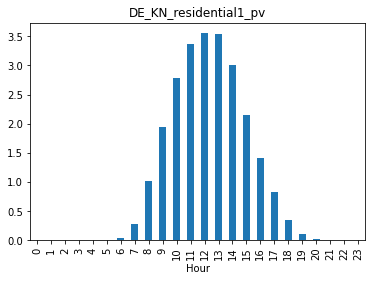

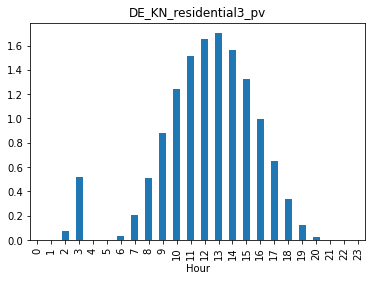

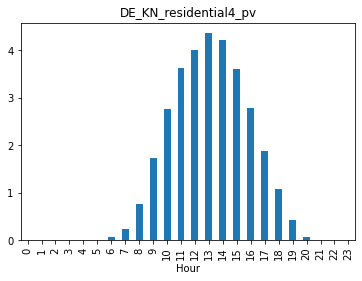

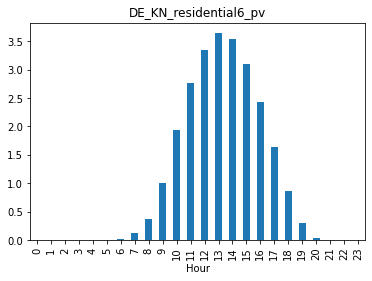

In [17]:
#visualize again

for col in GERdata.columns:
  if "pv" in col:  #only taking into account the pv-related columns 
    GERdata[col].groupby(GERdata["Hour"]).mean().plot(kind="bar", title = col)
    plt.show()



In [18]:
# removed values are between 6:00 and 20:00 local time - Berlin_time (which means between 5:00 and 19:00 by UTC)
GERdata = GERdata.between_time('05:00','19:00')

GERdata.head(20)

,cet_cest_timestamp,DE_KN_industrial1_pv_1,DE_KN_industrial1_pv_2,DE_KN_industrial2_pv,DE_KN_industrial3_pv_facade,DE_KN_industrial3_pv_roof,DE_KN_residential1_pv,DE_KN_residential3_pv,DE_KN_residential4_pv,DE_KN_residential6_pv,Berlin_time,Year,Month,Season,Week,Day,Year_day,Hour
utc_timestamp,,,,,,,,,,,,,,,,,,
2016-02-01 05:00:00+00:00,2016-02-01T06:00:00+0100,0.000,0.000,0.000,0.000,0.000,0.000,NaN,0.000,0.000,2016-02-01 06:00:00+01:00,2016,2,1,5,1,32,6
2016-02-01 06:00:00+00:00,2016-02-01T07:00:00+0100,0.000,0.000,0.000,0.000,0.000,0.000,NaN,0.000,0.000,2016-02-01 07:00:00+01:00,2016,2,1,5,1,32,7
2016-02-01 07:00:00+00:00,2016-02-01T08:00:00+0100,0.000,0.000,0.692,0.067,0.007,0.291,NaN,0.367,0.000,2016-02-01 08:00:00+01:00,2016,2,1,5,1,32,8
2016-02-01 08:00:00+00:00,2016-02-01T09:00:00+0100,0.020,0.000,2.712,0.813,0.063,1.258,NaN,1.628,0.038,2016-02-01 09:00:00+01:00,2016,2,1,5,1,32,9
2016-02-01 09:00:00+00:00,2016-02-01T10:00:00+0100,0.320,0.195,3.113,3.284,0.135,1.677,NaN,1.813,0.607,2016-02-01 10:00:00+01:00,2016,2,1,5,1,32,10
2016-02-01 10:00:00+00:00,2016-02-01T11:00:00+0100,0.430,0.335,2.712,4.770,0.233,1.453,NaN,1.792,0.430,2016-02-01 11:00:00+01:00,2016,2,1,5,1,32,11
2016-02-01 11:00:00+00:00,2016-02-01T12:00:00+0100,0.240,0.120,8.733,4.363,0.232,2.779,NaN,4.832,1.632,2016-02-01 12:00:00+01:00,2016,2,1,5,1,32,12
2016-02-01 12:00:00+00:00,2016-02-01T13:00:00+0100,0.195,0.085,7.178,4.056,0.246,2.383,NaN,4.081,0.555,2016-02-01 13:00:00+01:00,2016,2,1,5,1,32,13
2016-02-01 13:00:00+00:00,2016-02-01T14:00:00+0100,0.505,0.380,4.145,2.162,0.265,1.658,NaN,2.397,1.035,2016-02-01 14:00:00+01:00,2016,2,1,5,1,32,14


In [12]:
#save on drive as csv

GERdata_ready= GERdata.to_csv()
with open ("/content/drive/MyDrive/Master_thesis/Gerdata.csv", "w") as a:
  a.write(GERdata_ready)

# Outliers and missing values

outlier in DE_KN_residential3_pv ==> solar generation at night but this period has been removed from the model anyway
print(GERdata.isna().sum())

In [19]:
GERdata.describe()

,DE_KN_industrial1_pv_1,DE_KN_industrial1_pv_2,DE_KN_industrial2_pv,DE_KN_industrial3_pv_facade,DE_KN_industrial3_pv_roof,DE_KN_residential1_pv,DE_KN_residential3_pv,DE_KN_residential4_pv,DE_KN_residential6_pv,Year,Month,Season,Week,Day,Year_day,Hour
count,9300.000000,9300.000000,5995.000000,7350.000000,7350.000000,6090.000000,10547.000000,10965.000000,10965.000000,10965.000000,10965.000000,10965.000000,10965.000000,10965.000000,10965.000000,10965.000000
mean,1.132591,0.867644,3.366982,1.039778,2.522960,1.624323,0.848654,2.098935,1.672831,2016.584131,6.519836,2.507524,26.411765,15.738714,183.250342,13.593707
std,1.349752,1.037709,9.431541,1.502590,3.016386,2.138253,0.972714,2.362597,2.124392,0.572510,3.449708,1.117448,15.041127,8.804322,105.515771,4.348518
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000
25%,0.010000,0.000000,0.031000,0.008000,0.016000,0.008000,0.012000,0.055000,0.000000,2016.000000,4.000000,2.000000,13.000000,8.000000,92.000000,10.000000
50%,0.470000,0.380000,1.485000,0.310500,1.121000,0.600000,0.446000,1.054000,0.584000,2017.000000,7.000000,3.000000,26.000000,16.000000,183.000000,14.000000
75%,1.930000,1.561250,5.495500,1.370750,4.321750,2.493250,1.450000,3.644000,2.880000,2017.000000,10.000000,4.000000,39.000000,23.000000,275.000000,17.000000
max,4.750000,4.170000,666.849000,6.055000,11.101000,8.197000,3.730000,8.785000,7.646000,2018.000000,12.000000,4.000000,52.000000,31.000000,366.000000,21.000000


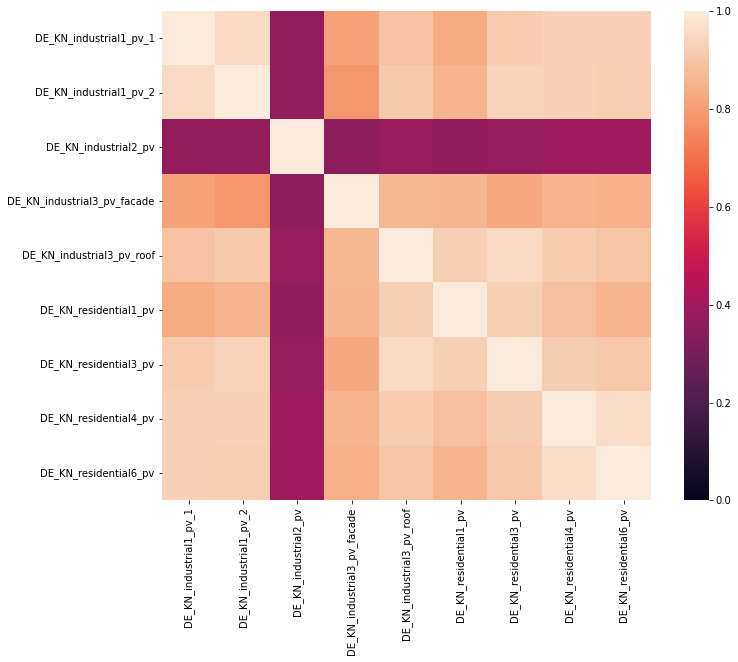

In [20]:
# Plot the Correlation map to see how features are correlated with target: SalePrice
import seaborn as sns

only_pv_cols = GERdata.iloc[:,1:11]

corr_matrix = only_pv_cols.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr_matrix, vmin=0, vmax=1, square=True, fmt='.2f', annot_kws={'size': 10})

#observation: something wrong with dk_kn_industrial_pv2?? Above we can see that there are more missing values in this column
# all other variables are highly correlated which is logical: when there is a sun, all of generate sun power, 
#all of them stop generating when the sun is down

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


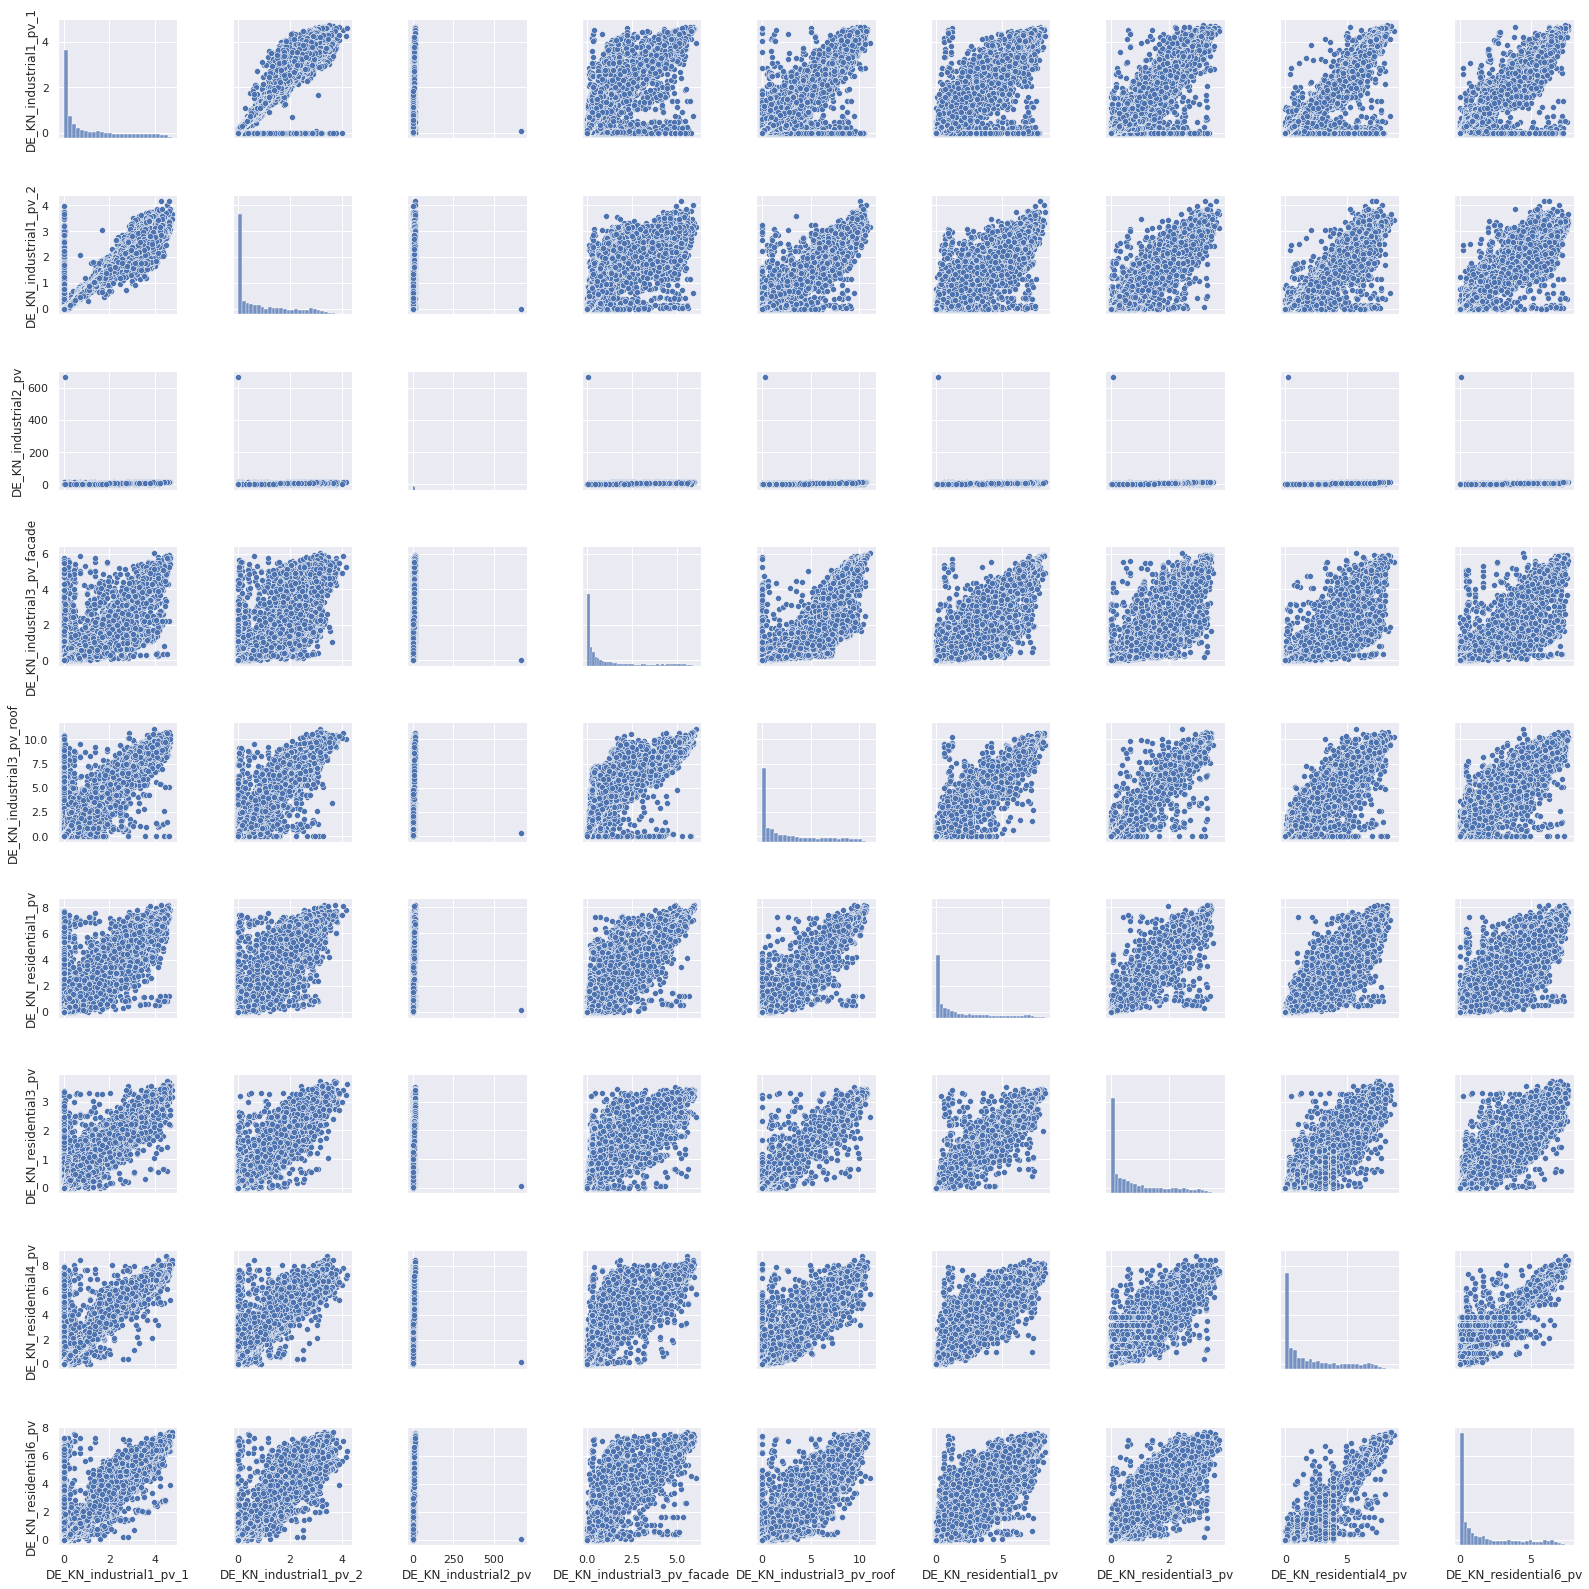

In [21]:
sns.set()

sns.pairplot(only_pv_cols, size = 2.5)
plt.show();

In [ ]:
#imputation code sample

#  from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import Imputer
# imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
# logreg = LogisticRegression()
# steps = [('imputation', imp),
#              ('logistic_regression', logreg)]
# pipeline = Pipeline(steps)
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#     test_size=0.3, random_state=42)

# pipeline.fit(X_train, y_train)
# y_pred = pipeline.predict(X_test)
# pipeline.score(X_test, y_test)

# Feature normalization (scaling or centering)

Standardization (all features centered around zero and variance one)


# Feature Extraction